# Basic integration with google drive and using basic packages with tensorflow!!!

In [1]:
import os
import sys
sys.version

'3.6.3 (default, Oct  3 2017, 21:45:48) \n[GCC 7.2.0]'

In [2]:
! pip install psutil 
#! pip install keras==2.1.4
! pip install -U -q PyDrive

In [3]:
import keras
import psutil
import pandas as pd
import tensorflow as tf
from google.colab import auth
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

Using TensorFlow backend.


In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prabhukiran","key":"b3bd64d38d248dc58ef98283c7d17fec"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!pip install -q kaggle

In [9]:
!kaggle competitions download -c plant-seedlings-classification

  0%|                                               | 0.00/5.13k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 5.13k/5.13k [00:00<00:00, 3.48MB/s]
 78%|█████████████████████████████▌        | 67.0M/86.0M [00:00<00:00, 64.9MB/s]
100%|███████████████████████████████████████| 86.0M/86.0M [00:00<00:00, 129MB/s]
 99%|██████████████████████████████████████▌| 1.58G/1.60G [00:11<00:00, 108MB/s]
100%|███████████████████████████████████████| 1.60G/1.60G [00:11<00:00, 147MB/s]


## Setting up Google drive authentication and setting system for proper google drive access...

In [0]:
# need to be done only once
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [10]:
#we will use the google drive work as a local drive and save the model
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0

Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17)

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#creds = GoogleCredentials.get_application_default()
#import getpass
#!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
#vcode = getpass.getpass()
#!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


In [12]:
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [13]:
# Create a directory 'MyModelSummary' and mount Google Drive using that directory.
!mkdir -p ICSummary
!google-drive-ocamlfuse -o nonempty ICSummary

#create a directory to save model summary in the mounted directory,this is where we save all the model specifications
#1.the architecture of the model, allowing to re-create the model
#2.the weights of the model
#3.the training configuration (loss, optimizer)
#4.the state of the optimizer, allowing to resume training exactly where you left off.
#!mkdir /content/ICSummary/

!chmod 777 /content/ICSummary/


chmod: changing permissions of '/content/ICSummary/': Input/output error


In [14]:
! ls

datalab  ICSummary  kaggle.json


### Now we have every thing setup... Its time to roll the ball with our initial dataset..

In [0]:
!mkdir ./dataset
!mv /content/.kaggle/competitions/plant-seedlings-classification/* ./dataset/

In [16]:
!unzip ./dataset/train.zip
!unzip ./dataset/test.zip

Archive:  ./dataset/train.zip
   creating: train/
   creating: train/Fat Hen/
  inflating: train/Fat Hen/5bdfa3a44.png  
  inflating: train/Fat Hen/a86b9c0cd.png  
  inflating: train/Fat Hen/f3f6559bf.png  
  inflating: train/Fat Hen/946b48f62.png  
  inflating: train/Fat Hen/4d7fd4020.png  
  inflating: train/Fat Hen/2509e5bc5.png  
  inflating: train/Fat Hen/e2462573b.png  
  inflating: train/Fat Hen/7e98e4aa6.png  
  inflating: train/Fat Hen/075cb6666.png  
  inflating: train/Fat Hen/b43d0a350.png  
  inflating: train/Fat Hen/afac20b21.png  
  inflating: train/Fat Hen/4d2efbb45.png  
  inflating: train/Fat Hen/f0923dcd6.png  
  inflating: train/Fat Hen/180f41d53.png  
  inflating: train/Fat Hen/bfdeafadd.png  
  inflating: train/Fat Hen/ac6625b0f.png  
  inflating: train/Fat Hen/ba5c8f87f.png  
  inflating: train/Fat Hen/e7d278e0e.png  
  inflating: train/Fat Hen/efaab2370.png  
  inflating: train/Fat Hen/9d4722e74.png  
  inflating: train/Fat Hen/4e2f543a2.png  
  inflating: train/


  inflating: train/Fat Hen/5d9dd8926.png  
  inflating: train/Fat Hen/81db6f8a2.png  
  inflating: train/Fat Hen/56ee7f90f.png  
  inflating: train/Fat Hen/ea7e6ec7f.png  
  inflating: train/Fat Hen/ff9f29145.png  
  inflating: train/Fat Hen/4058dd2cd.png  
  inflating: train/Fat Hen/f86c14eaf.png  
  inflating: train/Fat Hen/e8c85738d.png  
  inflating: train/Fat Hen/216b1daa0.png  
  inflating: train/Fat Hen/6cfecf7c5.png  
  inflating: train/Fat Hen/26220c5b7.png  
  inflating: train/Fat Hen/a1971cff3.png  
  inflating: train/Fat Hen/cbf4c5ad2.png  
  inflating: train/Fat Hen/ea6e91be6.png  
  inflating: train/Fat Hen/5c3a4a6ed.png  
  inflating: train/Fat Hen/28fad5a34.png  
  inflating: train/Fat Hen/f180203df.png  
  inflating: train/Fat Hen/7195021a5.png  
  inflating: train/Fat Hen/b0398be3d.png  
  inflating: train/Fat Hen/d1d6c2904.png  
  inflating: train/Fat Hen/c740aa55a.png  
  inflating: train/Fat Hen/2d34a64af.png  
  inflating: train/Fat Hen/fe23b8530.png  
  inflatin


  inflating: train/Small-flowered Cranesbill/e0ed50f3a.png  
  inflating: train/Small-flowered Cranesbill/13729b12c.png  
  inflating: train/Small-flowered Cranesbill/e682d2f54.png  
  inflating: train/Small-flowered Cranesbill/9b569f4c2.png  
  inflating: train/Small-flowered Cranesbill/91cd35be2.png  
  inflating: train/Small-flowered Cranesbill/a1ab74926.png  
  inflating: train/Small-flowered Cranesbill/ccf00806f.png  
  inflating: train/Small-flowered Cranesbill/76b2d6bf8.png  
  inflating: train/Small-flowered Cranesbill/c3eb8fe23.png  
  inflating: train/Small-flowered Cranesbill/8788bc3cb.png  
  inflating: train/Small-flowered Cranesbill/d0300ef58.png  
  inflating: train/Small-flowered Cranesbill/1476d787e.png  
  inflating: train/Small-flowered Cranesbill/3e2d7bdea.png  
  inflating: train/Small-flowered Cranesbill/6118042fe.png  
  inflating: train/Small-flowered Cranesbill/8032a7f05.png  
  inflating: train/Small-flowered Cranesbill/f1196e55f.png  
  inflating: train/Smal


  inflating: train/Small-flowered Cranesbill/ea39d1bf1.png  
  inflating: train/Small-flowered Cranesbill/ae9b5d027.png  
  inflating: train/Small-flowered Cranesbill/c423a70c3.png  
  inflating: train/Small-flowered Cranesbill/9f4b3c440.png  
  inflating: train/Small-flowered Cranesbill/460ac5645.png  
  inflating: train/Small-flowered Cranesbill/7e8c89d30.png  
  inflating: train/Small-flowered Cranesbill/816965c05.png  
  inflating: train/Small-flowered Cranesbill/6d7fa83ff.png  
  inflating: train/Small-flowered Cranesbill/f263c0f9f.png  
  inflating: train/Small-flowered Cranesbill/c9fa2e553.png  
  inflating: train/Small-flowered Cranesbill/665a286fb.png  
  inflating: train/Small-flowered Cranesbill/62e0225ab.png  
  inflating: train/Small-flowered Cranesbill/89d260299.png  
  inflating: train/Small-flowered Cranesbill/b168dd77c.png  
  inflating: train/Small-flowered Cranesbill/16ecc632f.png  
  inflating: train/Small-flowered Cranesbill/464e4863b.png  
  inflating: train/Smal


  inflating: train/Cleavers/d8f23e930.png  
  inflating: train/Cleavers/82a9322ea.png  
  inflating: train/Cleavers/58be08e22.png  
  inflating: train/Cleavers/1e33a3dce.png  
  inflating: train/Cleavers/34f210a03.png  
  inflating: train/Cleavers/1896061bc.png  
  inflating: train/Cleavers/d9739baa6.png  
  inflating: train/Cleavers/8c0e41a93.png  
  inflating: train/Cleavers/495602403.png  
  inflating: train/Cleavers/33c1f167f.png  
  inflating: train/Cleavers/16e0482dd.png  
  inflating: train/Cleavers/eb2b0d2f6.png  
  inflating: train/Cleavers/b07aeb162.png  
  inflating: train/Cleavers/94fa687c1.png  
  inflating: train/Cleavers/11c5eb5b6.png  
  inflating: train/Cleavers/952540220.png  
  inflating: train/Cleavers/c3f4b326a.png  
  inflating: train/Cleavers/8ee3f0b6f.png  
  inflating: train/Cleavers/5439f9f36.png  
  inflating: train/Cleavers/07ac7bc07.png  
  inflating: train/Cleavers/8df9991b8.png  
  inflating: train/Cleavers/03bee43c0.png  
  inflating: train/Cleavers/921


  inflating: train/Black-grass/d090d6b25.png  
  inflating: train/Black-grass/bab8eb04a.png  
  inflating: train/Black-grass/3b7d1fe82.png  
  inflating: train/Black-grass/40bf7be90.png  
  inflating: train/Black-grass/7050b0b8a.png  
  inflating: train/Black-grass/0e91f92a1.png  
  inflating: train/Black-grass/3de7650a2.png  
  inflating: train/Black-grass/1af1eddd3.png  
  inflating: train/Black-grass/afaade548.png  
  inflating: train/Black-grass/d3e69adad.png  
  inflating: train/Black-grass/2ed589264.png  
  inflating: train/Black-grass/e4af651a3.png  
  inflating: train/Black-grass/31958c132.png  
  inflating: train/Black-grass/a0baf5f7b.png  
  inflating: train/Black-grass/c1ab59648.png  
  inflating: train/Black-grass/e62aa6d6e.png  
  inflating: train/Black-grass/1a125880e.png  
  inflating: train/Black-grass/4e1cb1e27.png  
  inflating: train/Black-grass/cc90c662f.png  
  inflating: train/Black-grass/550dfcb36.png  
  inflating: train/Black-grass/5d358beb9.png  
  inflating:


  inflating: train/Black-grass/963dbc831.png  
  inflating: train/Black-grass/13a7f553a.png  
  inflating: train/Black-grass/14719a83e.png  
  inflating: train/Black-grass/71f6e3227.png  
  inflating: train/Black-grass/c66bab8b6.png  
  inflating: train/Black-grass/129c51855.png  
  inflating: train/Black-grass/20b2cbaed.png  
  inflating: train/Black-grass/5296a06e6.png  
  inflating: train/Black-grass/77629b9e3.png  
  inflating: train/Black-grass/0b3e7a7a9.png  
  inflating: train/Black-grass/e5a6e8ebc.png  
  inflating: train/Black-grass/a8ab1ff26.png  
  inflating: train/Black-grass/5a1295fb4.png  
  inflating: train/Black-grass/0dad57e7f.png  
  inflating: train/Black-grass/f47390401.png  
  inflating: train/Black-grass/a0405de4d.png  
  inflating: train/Black-grass/163c13912.png  
  inflating: train/Black-grass/898ecfa78.png  
  inflating: train/Black-grass/4a3b96198.png  
  inflating: train/Black-grass/5e65dbdd7.png  
  inflating: train/Black-grass/7f37cd4e4.png  
  inflating:


  inflating: train/Sugar beet/0838d0a77.png  
  inflating: train/Sugar beet/fb57ce659.png  
  inflating: train/Sugar beet/d415a63be.png  
  inflating: train/Sugar beet/ba820bf35.png  
  inflating: train/Sugar beet/4dfe0db2c.png  
  inflating: train/Sugar beet/b44f9e223.png  
  inflating: train/Sugar beet/3e9d61115.png  
  inflating: train/Sugar beet/ab3b58928.png  
  inflating: train/Sugar beet/c5687dbb2.png  
  inflating: train/Sugar beet/00626e3be.png  
  inflating: train/Sugar beet/e81a8dacb.png  
  inflating: train/Sugar beet/999f75899.png  
  inflating: train/Sugar beet/f78fcd305.png  
  inflating: train/Sugar beet/8738994fa.png  
  inflating: train/Sugar beet/b47d8d8f9.png  
  inflating: train/Sugar beet/6d18daabd.png  
  inflating: train/Sugar beet/f171da2ef.png  
  inflating: train/Sugar beet/9ee5dbda4.png  
  inflating: train/Sugar beet/b2b9468af.png  
  inflating: train/Sugar beet/d5d909ed5.png  
  inflating: train/Sugar beet/d558ea002.png  
  inflating: train/Sugar beet/96a


  inflating: train/Sugar beet/96dfb46de.png  
  inflating: train/Sugar beet/f9a842f5f.png  
  inflating: train/Sugar beet/b98d35523.png  
  inflating: train/Sugar beet/29f0864b1.png  
  inflating: train/Sugar beet/1bdfd2206.png  
  inflating: train/Sugar beet/0f30a59c2.png  
  inflating: train/Sugar beet/ed71987ae.png  
  inflating: train/Sugar beet/d42bcf4bd.png  
  inflating: train/Sugar beet/866130efe.png  
  inflating: train/Sugar beet/8fafd3b98.png  
  inflating: train/Sugar beet/b8d4a8a59.png  
  inflating: train/Sugar beet/5780239a1.png  
  inflating: train/Sugar beet/9f70ba1fb.png  
  inflating: train/Sugar beet/d4998deee.png  
  inflating: train/Sugar beet/a9b7af892.png  
  inflating: train/Sugar beet/e4a149c23.png  
  inflating: train/Sugar beet/fc293eacb.png  
  inflating: train/Sugar beet/29a0e6bf9.png  
  inflating: train/Sugar beet/6ed387106.png  
  inflating: train/Sugar beet/3905347ff.png  
  inflating: train/Sugar beet/5255463b3.png  
  inflating: train/Sugar beet/1ab


  inflating: train/Shepherds Purse/847872e08.png  
  inflating: train/Shepherds Purse/3e0ccc451.png  
  inflating: train/Shepherds Purse/d26e5c8fc.png  
  inflating: train/Shepherds Purse/94adb2c3b.png  
  inflating: train/Shepherds Purse/19fb8b2cc.png  
  inflating: train/Shepherds Purse/a0ec33869.png  
  inflating: train/Shepherds Purse/589fb760c.png  
  inflating: train/Shepherds Purse/867bd5d63.png  
  inflating: train/Shepherds Purse/60ee96ab9.png  
  inflating: train/Shepherds Purse/c7a718917.png  
  inflating: train/Shepherds Purse/9451dd4d2.png  
  inflating: train/Shepherds Purse/5ec0b1607.png  
  inflating: train/Shepherds Purse/bea1ec909.png  
  inflating: train/Shepherds Purse/cc2c012f7.png  
  inflating: train/Shepherds Purse/04e064c46.png  
  inflating: train/Shepherds Purse/896a23ea3.png  
  inflating: train/Shepherds Purse/28a237418.png  
  inflating: train/Shepherds Purse/42556bc41.png  
  inflating: train/Shepherds Purse/bb8144729.png  
  inflating: train/Shepherds P


  inflating: train/Charlock/7b28fc70e.png  
  inflating: train/Charlock/2fd604008.png  
  inflating: train/Charlock/f0ced8a62.png  
  inflating: train/Charlock/a96c1356b.png  
  inflating: train/Charlock/3e2cf6dc3.png  
  inflating: train/Charlock/084a9cb18.png  
  inflating: train/Charlock/cb142c018.png  
  inflating: train/Charlock/e6918f541.png  
  inflating: train/Charlock/5283b8c96.png  
  inflating: train/Charlock/270209308.png  
  inflating: train/Charlock/7603e9dc8.png  
  inflating: train/Charlock/d8bd75282.png  
  inflating: train/Charlock/69734d263.png  
  inflating: train/Charlock/92184e2d6.png  
  inflating: train/Charlock/2097eebd0.png  
  inflating: train/Charlock/143f07e0d.png  
  inflating: train/Charlock/99a661104.png  
  inflating: train/Charlock/10d884885.png  
  inflating: train/Charlock/307dcba5f.png  
  inflating: train/Charlock/8dd1dbca2.png  
  inflating: train/Charlock/1d9676402.png  
  inflating: train/Charlock/65ea4e47c.png  
  inflating: train/Charlock/e28


  inflating: train/Charlock/11185184a.png  
  inflating: train/Charlock/9b419387b.png  
  inflating: train/Charlock/b10fcd298.png  
  inflating: train/Charlock/99f80eb00.png  
  inflating: train/Charlock/5db43df54.png  
  inflating: train/Charlock/75ae3b231.png  
  inflating: train/Charlock/f340a3378.png  
  inflating: train/Charlock/8b35222d0.png  
  inflating: train/Charlock/fe98d5e24.png  
  inflating: train/Charlock/ed260e354.png  
  inflating: train/Charlock/a30113dfc.png  
  inflating: train/Charlock/654bb174e.png  
  inflating: train/Charlock/0f951d51e.png  
  inflating: train/Charlock/1716acd53.png  
  inflating: train/Charlock/d3228543a.png  
  inflating: train/Charlock/a631f152b.png  
  inflating: train/Charlock/17199b5a7.png  
  inflating: train/Charlock/1876d091f.png  
  inflating: train/Charlock/704e5bf0a.png  
  inflating: train/Charlock/5b8301d7f.png  
  inflating: train/Charlock/eb9d116cf.png  
  inflating: train/Charlock/d9d4e0305.png  
  inflating: train/Charlock/398


  inflating: train/Loose Silky-bent/e9e0e6feb.png  
  inflating: train/Loose Silky-bent/dbe5c4ab1.png  
  inflating: train/Loose Silky-bent/3f13f9bae.png  
  inflating: train/Loose Silky-bent/47f57446f.png  
  inflating: train/Loose Silky-bent/eda07616f.png  
  inflating: train/Loose Silky-bent/e913e5ca6.png  
  inflating: train/Loose Silky-bent/0bcf22873.png  
  inflating: train/Loose Silky-bent/b83843fd5.png  
  inflating: train/Loose Silky-bent/4c0447f59.png  
  inflating: train/Loose Silky-bent/549a41c42.png  
  inflating: train/Loose Silky-bent/e9c9b0bac.png  
  inflating: train/Loose Silky-bent/430dac673.png  
  inflating: train/Loose Silky-bent/ddf6295e6.png  
  inflating: train/Loose Silky-bent/9bf1450b6.png  
  inflating: train/Loose Silky-bent/a8085a6fc.png  
  inflating: train/Loose Silky-bent/d62f8f844.png  
  inflating: train/Loose Silky-bent/ca34fdafb.png  
  inflating: train/Loose Silky-bent/8935e4b49.png  
  inflating: train/Loose Silky-bent/8a53a8d6f.png  
  inflating


  inflating: train/Loose Silky-bent/009d8d799.png  
  inflating: train/Loose Silky-bent/5bb2ae820.png  
  inflating: train/Loose Silky-bent/df615189b.png  
  inflating: train/Loose Silky-bent/f284e84bc.png  
  inflating: train/Loose Silky-bent/eafe89ea6.png  
  inflating: train/Loose Silky-bent/58b8aa1f3.png  
  inflating: train/Loose Silky-bent/1f154441a.png  
  inflating: train/Loose Silky-bent/d766d9692.png  
  inflating: train/Loose Silky-bent/1804ef033.png  
  inflating: train/Loose Silky-bent/4a660a07c.png  
  inflating: train/Loose Silky-bent/7ebd4f913.png  
  inflating: train/Loose Silky-bent/ee4a45967.png  
  inflating: train/Loose Silky-bent/73f67dafe.png  
  inflating: train/Loose Silky-bent/1656d2df4.png  
  inflating: train/Loose Silky-bent/15b1ea490.png  
  inflating: train/Loose Silky-bent/7a8370ede.png  
  inflating: train/Loose Silky-bent/b0b2c3bdd.png  
  inflating: train/Loose Silky-bent/465a268eb.png  
  inflating: train/Loose Silky-bent/7b48abef4.png  
  inflating


  inflating: train/Loose Silky-bent/aa7620ab1.png  
  inflating: train/Loose Silky-bent/20df07699.png  
  inflating: train/Loose Silky-bent/5a141b349.png  
  inflating: train/Loose Silky-bent/c0f87cf17.png  
  inflating: train/Loose Silky-bent/b204c0ea0.png  
  inflating: train/Loose Silky-bent/624288db1.png  
  inflating: train/Loose Silky-bent/3a39e5bc5.png  
  inflating: train/Loose Silky-bent/30512e18a.png  
  inflating: train/Loose Silky-bent/de82f96f1.png  
  inflating: train/Loose Silky-bent/c30c4c58e.png  
  inflating: train/Loose Silky-bent/32c19240b.png  
  inflating: train/Loose Silky-bent/14469febc.png  
  inflating: train/Loose Silky-bent/96504ba69.png  
  inflating: train/Loose Silky-bent/4f5d80c92.png  
  inflating: train/Loose Silky-bent/bc72693f3.png  
  inflating: train/Loose Silky-bent/c21fd1c63.png  
  inflating: train/Loose Silky-bent/88a48f427.png  
  inflating: train/Loose Silky-bent/15fa7044b.png  
  inflating: train/Loose Silky-bent/3affdd752.png  
  inflating


  inflating: train/Scentless Mayweed/a390479c5.png  
  inflating: train/Scentless Mayweed/a75b742cd.png  
  inflating: train/Scentless Mayweed/8e6c73968.png  
  inflating: train/Scentless Mayweed/05ceff7d1.png  
  inflating: train/Scentless Mayweed/1ea513913.png  
  inflating: train/Scentless Mayweed/deb23c029.png  
  inflating: train/Scentless Mayweed/fdc682350.png  
  inflating: train/Scentless Mayweed/61974ff26.png  
  inflating: train/Scentless Mayweed/9151d1f37.png  
  inflating: train/Scentless Mayweed/62d1b63f3.png  
  inflating: train/Scentless Mayweed/a74ecf401.png  
  inflating: train/Scentless Mayweed/7917df3ec.png  
  inflating: train/Scentless Mayweed/88b1699ea.png  
  inflating: train/Scentless Mayweed/a5f531177.png  
  inflating: train/Scentless Mayweed/b5a8e95f3.png  
  inflating: train/Scentless Mayweed/fa57f2070.png  
  inflating: train/Scentless Mayweed/21fcc7b8b.png  
  inflating: train/Scentless Mayweed/47ca1a63c.png  
  inflating: train/Scentless Mayweed/d8dd45bb


  inflating: train/Maize/907817b91.png  
  inflating: train/Maize/266211c3c.png  
  inflating: train/Maize/5112e0b90.png  
  inflating: train/Maize/9d588ace5.png  
  inflating: train/Maize/bb9f796ce.png  
  inflating: train/Maize/fbd09f3a5.png  
  inflating: train/Maize/4ef677ce4.png  
  inflating: train/Maize/9fc63a912.png  
  inflating: train/Maize/4e04b01b7.png  
 extracting: train/Maize/59f972ef4.png  
  inflating: train/Maize/2d9adb800.png  
  inflating: train/Maize/44d562432.png  
  inflating: train/Maize/b0df48778.png  
  inflating: train/Maize/a53a61390.png  
  inflating: train/Maize/5b94fab70.png  
  inflating: train/Maize/f30971a76.png  
  inflating: train/Maize/814e74c21.png  
  inflating: train/Maize/67c3663a8.png  
  inflating: train/Maize/5622305e8.png  
  inflating: train/Maize/5d641d627.png  
  inflating: train/Maize/5675e608c.png  
  inflating: train/Maize/f60369038.png  
  inflating: train/Maize/3ef465952.png  
  inflating: train/Maize/91a9d5b9d.png  
  inflating: tr

  inflating: train/Maize/cdcb0f735.png  
  inflating: train/Maize/3cf92e356.png  
  inflating: train/Maize/ff4b55219.png  
  inflating: train/Maize/1d21b25f9.png  
   creating: train/Common Chickweed/
  inflating: train/Common Chickweed/34455bf75.png  
  inflating: train/Common Chickweed/151a67732.png  
  inflating: train/Common Chickweed/78836bb95.png  
  inflating: train/Common Chickweed/985eb4e09.png  
  inflating: train/Common Chickweed/1e21aff50.png  
  inflating: train/Common Chickweed/18757e215.png  
  inflating: train/Common Chickweed/10c956c81.png  
  inflating: train/Common Chickweed/085df38fb.png  
  inflating: train/Common Chickweed/518787d0b.png  
  inflating: train/Common Chickweed/990f7310e.png  
  inflating: train/Common Chickweed/672d71ed0.png  
  inflating: train/Common Chickweed/ef9e034f0.png  
  inflating: train/Common Chickweed/326192149.png  
  inflating: train/Common Chickweed/4adc3cf32.png  
  inflating: train/Common Chickweed/6e64646e7.png  
  inflating: train/


  inflating: train/Common Chickweed/97ab5baf0.png  
  inflating: train/Common Chickweed/91d294b43.png  
  inflating: train/Common Chickweed/2f60156c7.png  
  inflating: train/Common Chickweed/eddaf3d47.png  
  inflating: train/Common Chickweed/ed0299f6d.png  
  inflating: train/Common Chickweed/f9b43d3c6.png  
  inflating: train/Common Chickweed/cb5e1b823.png  
  inflating: train/Common Chickweed/aac309dc5.png  
  inflating: train/Common Chickweed/e768d348e.png  
  inflating: train/Common Chickweed/517dd299e.png  
  inflating: train/Common Chickweed/48bc50005.png  
  inflating: train/Common Chickweed/a42ddba4f.png  
  inflating: train/Common Chickweed/6afe50f7c.png  
  inflating: train/Common Chickweed/aa8778e2d.png  
  inflating: train/Common Chickweed/0118f1f70.png  
  inflating: train/Common Chickweed/45204fe38.png  
  inflating: train/Common Chickweed/0a2d20538.png  
  inflating: train/Common Chickweed/2e795ccf1.png  
  inflating: train/Common Chickweed/687fdd0f0.png  
  inflating


  inflating: train/Common wheat/a6d688d93.png  
  inflating: train/Common wheat/b8525b55d.png  
  inflating: train/Common wheat/6d428b06d.png  
  inflating: train/Common wheat/71c7dd2a2.png  
  inflating: train/Common wheat/a65244218.png  
  inflating: train/Common wheat/df584ca28.png  
  inflating: train/Common wheat/629176d9d.png  
  inflating: train/Common wheat/8211489bf.png  
  inflating: train/Common wheat/2c4813e68.png  
  inflating: train/Common wheat/a413c7490.png  
  inflating: train/Common wheat/fc03ee09b.png  
  inflating: train/Common wheat/9c8cf72ed.png  
  inflating: train/Common wheat/1a6add1b0.png  
  inflating: train/Common wheat/4fddf78f3.png  
  inflating: train/Common wheat/c7b35625d.png  
  inflating: train/Common wheat/9b3ec2b81.png  
  inflating: train/Common wheat/602b2a010.png  
  inflating: train/Common wheat/9efa077b7.png  
  inflating: train/Common wheat/a53419433.png  
  inflating: train/Common wheat/c97e74bd0.png  
  inflating: train/Common wheat/5386db6

  inflating: test/8585f9718.png      
  inflating: test/3efa1f66c.png      
  inflating: test/7c85b0265.png      
  inflating: test/3e9f41817.png      
  inflating: test/d2fd9df40.png      
  inflating: test/54c8bb900.png      
  inflating: test/4e69d100a.png      
  inflating: test/e52493d0b.png      
  inflating: test/32c86784b.png      
  inflating: test/e9cd91682.png      
  inflating: test/187668bde.png      
  inflating: test/edfdb4aeb.png      
  inflating: test/0bf7bfb05.png      
  inflating: test/0751c0bbc.png      
  inflating: test/4c8005bbc.png      
  inflating: test/cfb18d262.png      
  inflating: test/780defa2e.png      
  inflating: test/86c309150.png      
  inflating: test/c64370a72.png      
  inflating: test/dfb1d9012.png      
  inflating: test/9d3cb4745.png      
  inflating: test/406ecb5c5.png      
  inflating: test/6b9d6f8c9.png      
  inflating: test/bf3924a57.png      
  inflating: test/c0f5d9ac8.png      
  inflating: test/8e3ed0a25.png      
  inflating:


  inflating: test/239bdf640.png      
  inflating: test/e14afa235.png      
  inflating: test/d41d87796.png      
  inflating: test/7d4cd07ad.png      
  inflating: test/a2d25b4f3.png      
  inflating: test/fc6f686fb.png      
  inflating: test/e5297b675.png      
  inflating: test/6bce55e05.png      
  inflating: test/c35efa095.png      
  inflating: test/67ce3eaa6.png      
  inflating: test/4823c3ffa.png      
  inflating: test/b0acaff4a.png      
  inflating: test/3f64c2c1b.png      
  inflating: test/728eabae1.png      
  inflating: test/1fefb54b7.png      
  inflating: test/a83820a2c.png      
  inflating: test/406162ef9.png      
  inflating: test/7cabd68cc.png      
  inflating: test/65e262a6d.png      
  inflating: test/615d2b0a9.png      
  inflating: test/f48916a8c.png      
  inflating: test/e783f5a4f.png      
  inflating: test/785a73ab8.png      
  inflating: test/79fba50db.png      
  inflating: test/36d62bf36.png      
  inflating: test/3a909ead8.png      
  inflating

In [0]:
!mv train ./dataset/
!mv test ./dataset/

In [18]:
!ls ./dataset/train

Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet


#### Writing the helper and cleaning fucntions for processing the data set!

In [0]:
import hashlib
import numpy as np
from glob import glob
from random import shuffle
from skimage.color import gray2rgb
from scipy.misc import imread, imsave

#keras imports

from keras.applications import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications import xception

from keras import optimizers
from keras.models import Model, Sequential
from keras.layers.core import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,TensorBoard

# for class behaviour
from sklearn.metrics import accuracy_score, confusion_matrix

# For some plotting
from keras.utils import plot_model
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import seaborn as sns

# Stop training if validation loss doesn't improve for 10 epochs
earlystop = EarlyStopping(monitor = "val_loss", 
                          patience = 10, 
                          verbose = 1, 
                          mode = "auto")

# Save the best model after every epoch
checkpoint = ModelCheckpoint(filepath = "inceptionv3.hdf5", 
                             verbose = 1, 
                             save_best_only = True)

# Reduce the learning rate after validation loss plateaus
reducelr = ReduceLROnPlateau(monitor = "val_loss", 
                             factor = 0.2,
                             patience = 5)

TARGET_SIZE = (299, 299) # Input shape for Inception v3
BATCH_SIZE = 64 # Batch size for training


In [0]:
# Function to clean repetitive images
def clean_train(train_folder):
    '''Removes duplicates in train folder where the same images appears in
    more than one class'''
    hashes = {}
    labels = {}

    print("computing md5 of training data")

    for fname in glob(train_folder+"/*/*.jpg"):
        labels[fname] = fname.split("//")[-2]
        h = hashlib.md5(open(fname,"rb").read()).hexdigest()  
        if h in hashes:
            hashes[h].append(fname)
        else:
            hashes[h] = [fname]
    
    # Find duplicates
    repeated = sum(1 for k,v in hashes.items() if len(v) > 1 )
    print("Files appearing more than once in train: ", repeated)
    
    del_files = []
    
    # Find duplicate images with different class names
    for k,v in hashes.items():
        if len(v) > 1:
            c = set([labels[x] for x in v])
            if len(c) > 1:
                del_files = del_files.append(v)
    
    for x in del_files:
        os.remove(x)

    print(len(del_files), "images deleted from training set")

In [0]:
# Function for processing training images with classes
def process_train_images(train_folder):
    ''' Function to convert training images to 3 channels (for images having
    4 channels or less than 3 channels)''' 
    
    classes = os.listdir(train_folder)
    for cla in classes:
        cla_path = os.path.join("dataset", "train", cla)
        for img in os.listdir(cla_path):
            img_path = os.path.join("dataset", "train", cla, img)
            img_file = imread(img_path)
            if len(img_file.shape) < 3:
                img_file = gray2rgb(img_file)
                img_file = img_file.astype(np.float32, copy = False)
                imsave(img_path, img_file)
            if len(img_file.shape) == 4:
                img_file = img_file[:,:,:-1]
                img_file = img_file.astype(np.float32, copy = False)
                imsave(img_path, img_file)
                

In [0]:
# Function for processing test images
def process_test_images(test_folder):
    ''' Function to convert test images to 3 channels (for images having
    4 channels or less than 3 channels)
    Convert from 4 channel inputs like : CMYK and Alpha to 3 channels'''
    for img in os.listdir(test_folder):
        img_path = os.path.join(test_folder, img)
        img_file = imread(img_path)
        if len(img_file.shape) < 3:
            img_file = gray2rgb(img_file)
            img_file = img_file.astype(np.float32, copy = False)
            imsave(img_path, img_file)
        if len(img_file.shape) == 4:
            img_file = img_file[:,:,:-1]
            img_file = img_file.astype(np.float32, copy = False)
            imsave(img_path, img_file)

In [0]:
# Function to seek images which are available in both train and test data
def find_leak(train_folder, test_folder):
    '''Finds images present in both training and test set'''

    hashes = {}
    labels = {}

    print("computing md5 of training data")

    for fname in glob(train_folder+"/*/*.jpg"):
        labels[fname] = fname.split("//")[-2]
        h = hashlib.md5(open(fname,"rb").read()).hexdigest()  
        if h in hashes:
            hashes[h].append(fname)
        else:
            hashes[h] = [fname]

    print("comparing training and test set")
    
    leaks = []
    for fname in glob(test_folder+"/*.jpg"):
        h = hashlib.md5(open(fname,"rb").read()).hexdigest()
        if h in hashes:
            leaks.append((fname.split("//")[-1],hashes[h][0].split("//")[-2]))

    print("Number of test images present in train:{}".format(len(leaks)))
    return leaks

In [0]:
# Function to create validation set of images from the data
def create_val_set(val_size):
    '''Function to create a validation set from training images'''
    if not os.path.exists("dataset//valid"):
        os.makedirs("dataset//valid")
    class_list = os.listdir("dataset//train")
    for cla in class_list:
        if os.path.exists(os.path.join("dataset", "valid", cla)):
            if len(os.listdir(os.path.join("dataset", "valid", cla))) == 0:
                new_files = os.listdir(os.path.join("dataset", "train", cla))
                new_files = remove_percentage(new_files, val_size)
                for nf in new_files:
                    os.rename(os.path.join("dataset", "train", cla, nf), 
                              os.path.join("dataset", "valid", cla, nf))
            else:
                new_files = os.listdir(os.path.join("dataset", "valid", cla))
                for nf in new_files:
                    os.rename(os.path.join("dataset", "valid", cla, nf),
                              os.path.join("dataset", "train", cla, nf))
                new_files = os.listdir(os.path.join("dataset", "train", cla))
                new_files = remove_percentage(new_files, val_size)
                for nf in new_files:
                    os.rename(os.path.join("dataset", "train", cla, nf), 
                              os.path.join("dataset", "valid", cla, nf))
        else:
            os.makedirs(os.path.join("dataset", "valid", cla))
            new_files = os.listdir(os.path.join("dataset", "train", cla))
            new_files = remove_percentage(new_files, val_size)
            for nf in new_files:
                os.rename(os.path.join("dataset", "train", cla, nf), 
                          os.path.join("dataset", "valid", cla, nf))

In [0]:
# Pre-processing function for Inception v3 model
def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

def remove_percentage(list_a, percentage):
    ''' Function to randomly pick x percentage from a list'''
    shuffle(list_a)
    count = int(len(list_a) * percentage)
    if not count: 
        return []
    list_a[-count:], list_b = [], list_a[-count:]
    return list_b
  
# Funciton for loading the model in Keras. Options can be defined as string.
from keras import metrics

def define_model(premodel='resnet'):
  
  
    if premodel == 'resnet':
      base_model = ResNet50(include_top=False, 
                            weights='imagenet', 
                            input_shape=(299, 299, 3), 
                            pooling=None, 
                            classes=1000)
      
    elif premodel == 'inception':
      base_model = InceptionV3(weights = "imagenet", 
                           include_top = False, 
                           input_shape = (299, 299, 3))

    elif premodel == 'xception':
      base_model = xception.Xception(weights='imagenet', 
                                     include_top=False, 
                                      input_shape = (299, 299, 3))
      
      
    base_model.layers.pop()
    for i in range(len(base_model.layers)):
        base_model.layers[i].trainable = True
        
    add_model = Sequential()
    add_model.add(Flatten(input_shape = base_model.output_shape[1:]))
    add_model.add(Dense(256, activation = "relu"))
    add_model.add(Dense(len(os.listdir("dataset//train")), activation="softmax"))
    model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
    model.compile(loss = "categorical_crossentropy", 
              optimizer = optimizers.SGD(lr = 1e-3, momentum = 0.9),
              metrics = ["accuracy",metrics.binary_accuracy])
    model.summary()
    return(model)


In [26]:
# Cleaning train data for replications
clean_train("dataset//train")

#Check whether any file appears in both training and test set
_ = find_leak("dataset//train", "dataset//test")

#Convert all training images to 3 channels
process_train_images("dataset//train")

#Convert all test images to 3 channels
process_test_images("dataset//test")

# Creating Validation dataset
create_val_set(0.2)

computing md5 of training data
Files appearing more than once in train:  0
0 images deleted from training set
computing md5 of training data
comparing training and test set
Number of test images present in train:0


In [27]:
#Load the pre-trained Inception V3 model
model = define_model(premodel="inception")

87916544/87910968 [==============================] - 6s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________

__________________________________________________________________________________________________
activation_89 (Activation)      (None, 8, 8, 384)    0           batch_normalization_89[0][0]     
__________________________________________________________________________________________________
activation_92 (Activation)      (None, 8, 8, 384)    0           batch_normalization_92[0][0]     
__________________________________________________________________________________________________
activation_93 (Activation)      (None, 8, 8, 384)    0           batch_normalization_93[0][0]     
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 8, 8, 192)    576         conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_86 (Activation)      (None, 8, 8, 320)    0           batch_normalization_86[0][0]     
__________

In [0]:
# lets plot the model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
train_datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
        ,preprocessing_function = preprocess_input
)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
  

In [31]:
train_generator = train_datagen.flow_from_directory(
        "dataset//train",
        target_size = TARGET_SIZE, 
        batch_size = BATCH_SIZE, 
        class_mode = "categorical")

Found 3803 images belonging to 12 classes.


In [32]:
validation_generator = train_datagen.flow_from_directory(
        "dataset//valid", 
        target_size = TARGET_SIZE, 
        batch_size = BATCH_SIZE, 
        class_mode = "categorical")

Found 947 images belonging to 12 classes.


In [33]:
!ls dataset//test|head

0021e90e4.png
003d61042.png
007b3da8b.png
0086a6340.png
00c47e980.png
00d090cde.png
00ef713a8.png
01291174f.png
026716f9b.png
02cfeb38d.png


In [34]:
test_generator = test_datagen.flow_from_directory(
        "dataset//test", 
        target_size = TARGET_SIZE, 
        batch_size = BATCH_SIZE, 
        class_mode = "categorical", 
        shuffle = False)

Found 0 images belonging to 0 classes.


In [35]:
!ls dataset/valid

Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet


In [0]:
#!mkdir Graph|chmod 777 Graph
tbCallBack = keras.callbacks.TensorBoard(log_dir='/content/Graph', 
                                         histogram_freq=0, 
                                         write_graph=True, 
                                         write_images=True)

earlystop = EarlyStopping(monitor = "val_loss", 
                          patience = 10, 
                          verbose = 1, 
                          mode = "auto")

checkpoint = ModelCheckpoint(filepath = "inceptionv3_v2.hdf5", 
                             verbose = 1, 
                             save_best_only = True)

reducelr = ReduceLROnPlateau(monitor = "val_loss", 
                             factor = 0.2,
                             patience = 2)

In [37]:
model.fit_generator(
        generator = train_generator,
        epochs = 50,
        callbacks = [checkpoint, earlystop, reducelr,tbCallBack],
        validation_data = validation_generator,
        verbose = 1)

Epoch 1/50
60/60 [==============================] - 205s 3s/step - loss: 1.5513 - acc: 0.4884 - binary_accuracy: 0.9365 - val_loss: 1.1556 - val_acc: 0.6272 - val_binary_accuracy: 0.9409

Epoch 00001: val_loss improved from inf to 1.15563, saving model to inceptionv3_v2.hdf5
Epoch 2/50
60/60 [==============================] - 177s 3s/step - loss: 0.4238 - acc: 0.8541 - binary_accuracy: 0.9769 - val_loss: 0.4392 - val_acc: 0.8395 - val_binary_accuracy: 0.9746

Epoch 00002: val_loss improved from 1.15563 to 0.43919, saving model to inceptionv3_v2.hdf5
Epoch 3/50
60/60 [==============================] - 183s 3s/step - loss: 0.2772 - acc: 0.9051 - binary_accuracy: 0.9844 - val_loss: 0.2778 - val_acc: 0.8976 - val_binary_accuracy: 0.9836

Epoch 00003: val_loss improved from 0.43919 to 0.27777, saving model to inceptionv3_v2.hdf5
Epoch 4/50
26/60 [============>.................] - ETA: 1:13 - loss: 0.2528 - acc: 0.9075 - binary_accuracy: 0.9846

60/60 [==============================] - 186s 3s/step - loss: 0.2128 - acc: 0.9223 - binary_accuracy: 0.9868 - val_loss: 0.2745 - val_acc: 0.8997 - val_binary_accuracy: 0.9842

Epoch 00004: val_loss improved from 0.27777 to 0.27452, saving model to inceptionv3_v2.hdf5
Epoch 5/50
60/60 [==============================] - 179s 3s/step - loss: 0.1645 - acc: 0.9418 - binary_accuracy: 0.9905 - val_loss: 0.1750 - val_acc: 0.9366 - val_binary_accuracy: 0.9892

Epoch 00005: val_loss improved from 0.27452 to 0.17499, saving model to inceptionv3_v2.hdf5
Epoch 6/50
60/60 [==============================] - 174s 3s/step - loss: 0.1409 - acc: 0.9500 - binary_accuracy: 0.9918 - val_loss: 0.1850 - val_acc: 0.9419 - val_binary_accuracy: 0.9907

Epoch 00006: val_loss did not improve from 0.17499
Epoch 7/50
34/60 [================>.............] - ETA: 55s - loss: 0.1287 - acc: 0.9531 - binary_accuracy: 0.9923

60/60 [==============================] - 180s 3s/step - loss: 0.1159 - acc: 0.9573 - binary_accuracy: 0.9930 - val_loss: 0.1760 - val_acc: 0.9398 - val_binary_accuracy: 0.9901

Epoch 00007: val_loss did not improve from 0.17499
Epoch 8/50
60/60 [==============================] - 189s 3s/step - loss: 0.0930 - acc: 0.9661 - binary_accuracy: 0.9945 - val_loss: 0.1643 - val_acc: 0.9409 - val_binary_accuracy: 0.9907

Epoch 00008: val_loss improved from 0.17499 to 0.16426, saving model to inceptionv3_v2.hdf5
Epoch 9/50
60/60 [==============================] - 183s 3s/step - loss: 0.0880 - acc: 0.9695 - binary_accuracy: 0.9950 - val_loss: 0.1539 - val_acc: 0.9514 - val_binary_accuracy: 0.9919

Epoch 00009: val_loss improved from 0.16426 to 0.15389, saving model to inceptionv3_v2.hdf5
Epoch 10/50
39/60 [==================>...........] - ETA: 45s - loss: 0.0858 - acc: 0.9683 - binary_accuracy: 0.9947

60/60 [==============================] - 176s 3s/step - loss: 0.0860 - acc: 0.9674 - binary_accuracy: 0.9945 - val_loss: 0.1634 - val_acc: 0.9356 - val_binary_accuracy: 0.9896

Epoch 00010: val_loss did not improve from 0.15389
Epoch 11/50
60/60 [==============================] - 175s 3s/step - loss: 0.0860 - acc: 0.9693 - binary_accuracy: 0.9948 - val_loss: 0.1541 - val_acc: 0.9440 - val_binary_accuracy: 0.9907

Epoch 00011: val_loss did not improve from 0.15389
Epoch 12/50
60/60 [==============================] - 177s 3s/step - loss: 0.0833 - acc: 0.9684 - binary_accuracy: 0.9949 - val_loss: 0.1336 - val_acc: 0.9578 - val_binary_accuracy: 0.9930

Epoch 00012: val_loss improved from 0.15389 to 0.13360, saving model to inceptionv3_v2.hdf5
Epoch 13/50
45/60 [=====================>........] - ETA: 32s - loss: 0.0755 - acc: 0.9717 - binary_accuracy: 0.9954

60/60 [==============================] - 175s 3s/step - loss: 0.0744 - acc: 0.9720 - binary_accuracy: 0.9954 - val_loss: 0.1485 - val_acc: 0.9535 - val_binary_accuracy: 0.9922

Epoch 00013: val_loss did not improve from 0.13360
Epoch 14/50
60/60 [==============================] - 180s 3s/step - loss: 0.0721 - acc: 0.9767 - binary_accuracy: 0.9960 - val_loss: 0.1501 - val_acc: 0.9493 - val_binary_accuracy: 0.9915

Epoch 00014: val_loss did not improve from 0.13360
Epoch 15/50
60/60 [==============================] - 176s 3s/step - loss: 0.0721 - acc: 0.9729 - binary_accuracy: 0.9956 - val_loss: 0.1587 - val_acc: 0.9493 - val_binary_accuracy: 0.9918

Epoch 00015: val_loss did not improve from 0.13360
Epoch 16/50
49/60 [=======================>......] - ETA: 24s - loss: 0.0801 - acc: 0.9736 - binary_accuracy: 0.9955

60/60 [==============================] - 177s 3s/step - loss: 0.0789 - acc: 0.9746 - binary_accuracy: 0.9957 - val_loss: 0.1614 - val_acc: 0.9567 - val_binary_accuracy: 0.9928

Epoch 00016: val_loss did not improve from 0.13360
Epoch 17/50
60/60 [==============================] - 179s 3s/step - loss: 0.0731 - acc: 0.9718 - binary_accuracy: 0.9953 - val_loss: 0.1461 - val_acc: 0.9504 - val_binary_accuracy: 0.9916

Epoch 00017: val_loss did not improve from 0.13360
Epoch 18/50
60/60 [==============================] - 181s 3s/step - loss: 0.0718 - acc: 0.9753 - binary_accuracy: 0.9959 - val_loss: 0.1379 - val_acc: 0.9514 - val_binary_accuracy: 0.9920

Epoch 00018: val_loss did not improve from 0.13360
Epoch 19/50
50/60 [========================>.....] - ETA: 23s - loss: 0.0777 - acc: 0.9712 - binary_accuracy: 0.9954

60/60 [==============================] - 179s 3s/step - loss: 0.0803 - acc: 0.9706 - binary_accuracy: 0.9953 - val_loss: 0.1423 - val_acc: 0.9504 - val_binary_accuracy: 0.9920

Epoch 00019: val_loss did not improve from 0.13360
Epoch 20/50
60/60 [==============================] - 174s 3s/step - loss: 0.0747 - acc: 0.9744 - binary_accuracy: 0.9958 - val_loss: 0.1346 - val_acc: 0.9525 - val_binary_accuracy: 0.9920

Epoch 00020: val_loss did not improve from 0.13360
Epoch 21/50
60/60 [==============================] - 172s 3s/step - loss: 0.0811 - acc: 0.9746 - binary_accuracy: 0.9956 - val_loss: 0.1457 - val_acc: 0.9461 - val_binary_accuracy: 0.9913

Epoch 00021: val_loss did not improve from 0.13360
Epoch 22/50
50/60 [========================>.....] - ETA: 21s - loss: 0.0785 - acc: 0.9730 - binary_accuracy: 0.9954

60/60 [==============================] - 176s 3s/step - loss: 0.0766 - acc: 0.9741 - binary_accuracy: 0.9957 - val_loss: 0.1320 - val_acc: 0.9525 - val_binary_accuracy: 0.9921

Epoch 00022: val_loss improved from 0.13360 to 0.13195, saving model to inceptionv3_v2.hdf5
Epoch 23/50
60/60 [==============================] - 173s 3s/step - loss: 0.0684 - acc: 0.9766 - binary_accuracy: 0.9962 - val_loss: 0.1505 - val_acc: 0.9556 - val_binary_accuracy: 0.9929

Epoch 00023: val_loss did not improve from 0.13195
Epoch 24/50
60/60 [==============================] - 175s 3s/step - loss: 0.0858 - acc: 0.9687 - binary_accuracy: 0.9947 - val_loss: 0.1484 - val_acc: 0.9493 - val_binary_accuracy: 0.9915

Epoch 00024: val_loss did not improve from 0.13195
Epoch 25/50
41/60 [===================>..........] - ETA: 41s - loss: 0.0671 - acc: 0.9748 - binary_accuracy: 0.9959

60/60 [==============================] - 173s 3s/step - loss: 0.0718 - acc: 0.9752 - binary_accuracy: 0.9960 - val_loss: 0.1301 - val_acc: 0.9504 - val_binary_accuracy: 0.9918

Epoch 00025: val_loss improved from 0.13195 to 0.13006, saving model to inceptionv3_v2.hdf5
Epoch 26/50
60/60 [==============================] - 173s 3s/step - loss: 0.0763 - acc: 0.9707 - binary_accuracy: 0.9952 - val_loss: 0.1667 - val_acc: 0.9451 - val_binary_accuracy: 0.9909

Epoch 00026: val_loss did not improve from 0.13006
Epoch 27/50
60/60 [==============================] - 175s 3s/step - loss: 0.0734 - acc: 0.9759 - binary_accuracy: 0.9960 - val_loss: 0.1464 - val_acc: 0.9461 - val_binary_accuracy: 0.9913

Epoch 00027: val_loss did not improve from 0.13006
Epoch 28/50
40/60 [===================>..........] - ETA: 43s - loss: 0.0681 - acc: 0.9750 - binary_accuracy: 0.9958

60/60 [==============================] - 173s 3s/step - loss: 0.0753 - acc: 0.9700 - binary_accuracy: 0.9950 - val_loss: 0.1520 - val_acc: 0.9493 - val_binary_accuracy: 0.9916

Epoch 00028: val_loss did not improve from 0.13006
Epoch 29/50
60/60 [==============================] - 174s 3s/step - loss: 0.0728 - acc: 0.9713 - binary_accuracy: 0.9954 - val_loss: 0.1421 - val_acc: 0.9419 - val_binary_accuracy: 0.9905

Epoch 00029: val_loss did not improve from 0.13006
Epoch 30/50
60/60 [==============================] - 174s 3s/step - loss: 0.0728 - acc: 0.9736 - binary_accuracy: 0.9956 - val_loss: 0.1433 - val_acc: 0.9556 - val_binary_accuracy: 0.9924

Epoch 00030: val_loss did not improve from 0.13006
Epoch 31/50
49/60 [=======================>......] - ETA: 23s - loss: 0.0803 - acc: 0.9744 - binary_accuracy: 0.9958

60/60 [==============================] - 178s 3s/step - loss: 0.0798 - acc: 0.9736 - binary_accuracy: 0.9957 - val_loss: 0.1514 - val_acc: 0.9483 - val_binary_accuracy: 0.9914

Epoch 00031: val_loss did not improve from 0.13006
Epoch 32/50
60/60 [==============================] - 178s 3s/step - loss: 0.0776 - acc: 0.9735 - binary_accuracy: 0.9956 - val_loss: 0.1318 - val_acc: 0.9578 - val_binary_accuracy: 0.9930

Epoch 00032: val_loss did not improve from 0.13006
Epoch 33/50
60/60 [==============================] - 177s 3s/step - loss: 0.0788 - acc: 0.9734 - binary_accuracy: 0.9955 - val_loss: 0.1644 - val_acc: 0.9514 - val_binary_accuracy: 0.9920

Epoch 00033: val_loss did not improve from 0.13006
Epoch 34/50
50/60 [========================>.....] - ETA: 22s - loss: 0.0784 - acc: 0.9734 - binary_accuracy: 0.9954

60/60 [==============================] - 178s 3s/step - loss: 0.0818 - acc: 0.9716 - binary_accuracy: 0.9951 - val_loss: 0.1469 - val_acc: 0.9567 - val_binary_accuracy: 0.9928

Epoch 00034: val_loss did not improve from 0.13006
Epoch 35/50
60/60 [==============================] - 178s 3s/step - loss: 0.0763 - acc: 0.9757 - binary_accuracy: 0.9961 - val_loss: 0.1307 - val_acc: 0.9546 - val_binary_accuracy: 0.9926

Epoch 00035: val_loss did not improve from 0.13006
Epoch 00035: early stopping


In [0]:
predictions = model.predict_generator(
        test_generator,
        verbose = 1)

In [39]:
predictions

[]

In [0]:
#predictions = np.argmax(predictions, axis = 1)
#labels = train_generator.class_indices
#predictions = [list(labels.keys())[list(labels.values()).index(i)] for i in predictions]

In [41]:
!ls /content/dataset/valid/Black-grass

075d004bc.png  2f6bc240a.png  6e027ec7d.png  a87fd277c.png  e2b2a20b2.png
0bb75ded8.png  32d97b170.png  70bfa70ff.png  afaade548.png  e47987eab.png
0d4f74f4a.png  34a672a63.png  765a69082.png  b561b3bc2.png  eac39cfa8.png
0fe440ed5.png  355cad34c.png  7b72b398d.png  bac2710a2.png  ecd14321d.png
129c51855.png  461feacba.png  8029e3396.png  bf5662989.png  ed4b42936.png
163c13912.png  48141d6a7.png  8dd397cd9.png  c1a625098.png  f47390401.png
163e571a6.png  4a7e7eba8.png  92e5fcce4.png  c66bab8b6.png  f5ca3d442.png
1a125880e.png  5a1295fb4.png  963dbc831.png  d090d6b25.png  fef14b865.png
20d4fab57.png  675a6956e.png  9e2bfa93d.png  d622ca3d2.png
228d8ad5c.png  6a19547c5.png  a0405de4d.png  d8afd58f3.png
260c4eed3.png  6aabdeb45.png  a1cb5a321.png  da5082ce2.png


In [42]:
data_dir = '/content/dataset/'
valid = []
for file in os.listdir('/content/dataset/valid'):
    valid.append(['valid/{}'.format(file), file])
valid = pd.DataFrame(valid, columns=['filepath', 'file'])
print(valid.head(2))
valid.shape

                 filepath              file
0  valid/Loose Silky-bent  Loose Silky-bent
1          valid/Charlock          Charlock


(12, 2)

In [43]:
glob('/content/dataset/valid/Black-grass/')

['/content/dataset/valid/Black-grass/']

In [44]:
np.random.choice(glob('/content/dataset/valid/Black-grass/*'),1)[0]

'/content/dataset/valid/Black-grass/163e571a6.png'

In [0]:
def read_img(filepath, size):
    random_image = np.random.choice(glob(os.path.join(data_dir, filepath,'*')),1)[0]
    img = image.load_img(random_image, target_size=size)
    img = image.img_to_array(img)
    return img

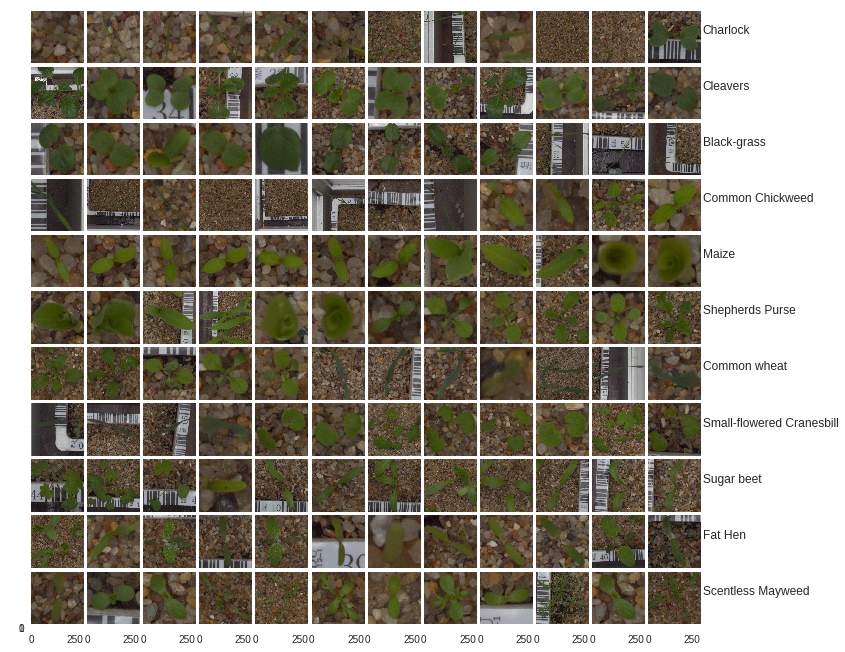

In [46]:
CATEGORIES = valid.file.values
NUM_CATEGORIES = len(CATEGORIES)

fig = plt.figure(1, figsize=(NUM_CATEGORIES, NUM_CATEGORIES))
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_CATEGORIES), axes_pad=0.05)
i = 0
for category_id, category in enumerate(CATEGORIES):
  for j in range(NUM_CATEGORIES-1):
    for filepath in valid[valid['file'] == category]['filepath'].values[:NUM_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (299, 299))
        ax.imshow(img / 255.)
        ax.axis('off')
        if i % NUM_CATEGORIES == NUM_CATEGORIES - 1:
            ax.text(310, 112, filepath.split('/')[1], verticalalignment='center')
        i += 1
plt.show();



In [47]:
predictions = model.predict_generator(
        validation_generator,
        verbose = 1)
predictions = np.argmax(predictions, axis = 1)
labels = validation_generator.class_indices
predictions = [list(labels.keys())[list(labels.values()).index(i)] for i in predictions]



15/15 [==============================] - 33s 2s/step


In [48]:
predictions[2:20]

['Sugar beet',
 'Black-grass',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Sugar beet',
 'Small-flowered Cranesbill',
 'Scentless Mayweed',
 'Small-flowered Cranesbill',
 'Black-grass',
 'Common Chickweed',
 'Loose Silky-bent',
 'Maize',
 'Sugar beet',
 'Common wheat',
 'Common Chickweed',
 'Charlock',
 'Scentless Mayweed',
 'Scentless Mayweed']

In [49]:
validation_generator.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [0]:

cnf_matrix = confusion_matrix([list(labels.keys())[list(labels.values()).index(i)] for i in validation_generator.classes], predictions)
abbreviation = validation_generator.class_indices

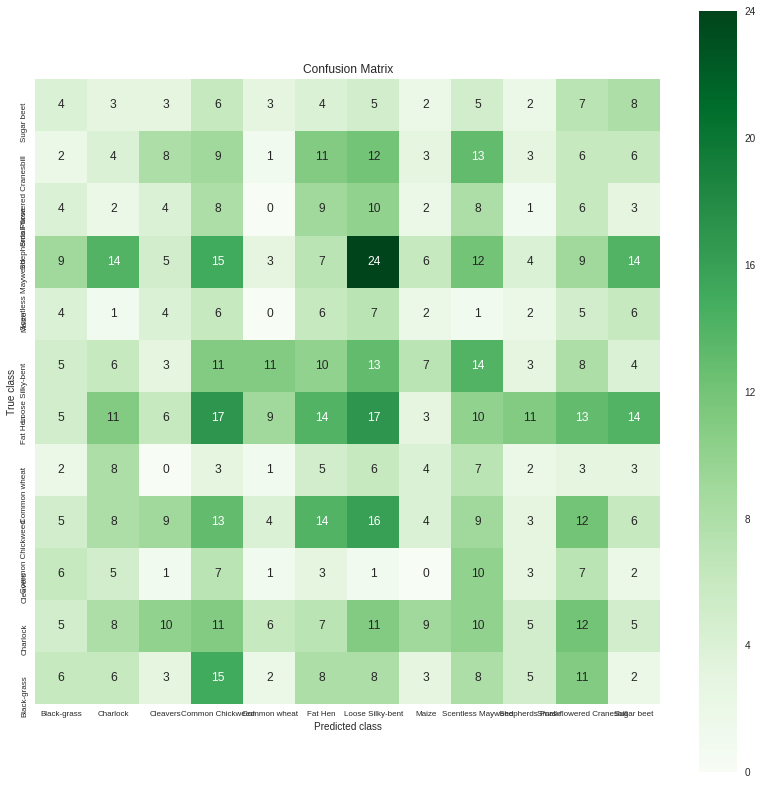

In [51]:
fig, ax = plt.subplots(1,figsize = (14,14))
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True, fmt = 'd')
ax.set_xticklabels(abbreviation, fontsize=8)
ax.set_yticklabels(abbreviation, fontsize=8)
ax.set_aspect('equal')
plt.title('Confusion Matrix')
plt.ylabel('True class',fontsize=10)
plt.xlabel('Predicted class',fontsize=10)
fig.savefig('Confusion matrix.png', dpi=600)
plt.show();

In [52]:
!pip install lime
from lime import lime_image

    100% |████████████████████████████████| 266kB 8.1MB/s 
  Running setup.py bdist_wheel for lime ... - \ done
  Stored in directory: /content/.cache/pip/wheels/b8/84/64/feaa6a3aef72109356c4e2be30eef7db76c49d43690eeef113
Successfully built lime


In [0]:
explainer = lime_image.LimeImageExplainer()
#%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(validation_generator[0][0][0], model.predict, top_labels=5, hide_color=0, num_samples=1000)

In [0]:
from keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from skimage.segmentation import mark_boundaries

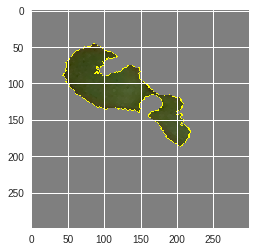

In [94]:
temp, mask = explanation.get_image_and_mask(list(explanation.top_labels)[0],positive_only=True,num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

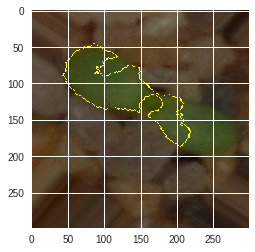

In [95]:
temp, mask = explanation.get_image_and_mask(list(explanation.top_labels)[0],positive_only=True,num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

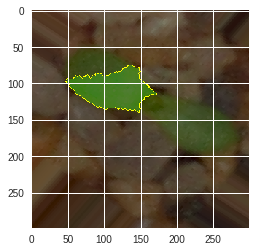

In [96]:
temp, mask = explanation.get_image_and_mask(list(explanation.top_labels)[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

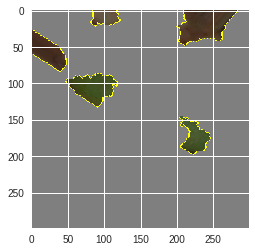

In [97]:
#let's check for another label
temp, mask = explanation.get_image_and_mask(list(explanation.top_labels)[1],positive_only=True,num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

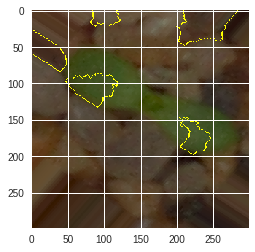

In [98]:
temp, mask = explanation.get_image_and_mask(list(explanation.top_labels)[1],positive_only=True,num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))